<a href="https://colab.research.google.com/github/snegi5/hello-github/blob/master/Module_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Background 
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

### Problem Statement
Using Neural Network crete a model to predict if the customer is likely to leave the bank or not. So that bank can take necessarry steps to avoid customer churn.

### Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.


* CustomerId: Unique ID which is assigned to each customer
* Surname: Last name of the customer 
* CreditScore: It defines the credit history of the customer.  
* Geography: A customer’s location    
* Gender: It defines the Gender of the customer   
* Age: Age of the customer     
* Tenure: Number of years for which the customer has been with the bank
* NumOfProducts: It refers to the number of products that a customer has  purchased through the bank.
* Balance: Account balance
* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
* EstimatedSalary: Estimated salary 
* isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
*Excited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )

In [463]:
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
#from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve,auc

import tensorflow as tf
import keras
from keras.models import Sequential#For building the Neural Network layer by layer
from keras.layers import Dense, Dropout





import warnings
warnings.filterwarnings("ignore")
from google.colab import files

#### Reading dataset

In [464]:
data = pd.read_csv('bank.csv')
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3825,3826,15762928,Venables,548,Spain,Male,44,8,0.00,1,1,0,16989.77,0
1615,1616,15722578,Spitzer,685,Germany,Female,21,6,97956.50,1,1,1,164966.27,0
9217,9218,15762588,Kaleski,644,France,Male,31,5,0.00,2,1,1,41872.17,0
8272,8273,15705739,Toscani,753,Germany,Male,32,5,159904.79,1,1,0,148811.14,0
4033,4034,15569079,Hagins,632,Germany,Male,48,6,126066.26,1,1,0,64345.61,1
6121,6122,15607629,Hollis,679,France,Male,48,8,0.00,2,1,0,23344.94,0
3050,3051,15699247,Chapman,791,France,Female,44,5,0.00,2,1,1,123977.86,1
1269,1270,15723339,Chin,554,France,Female,38,4,137654.05,2,1,1,172629.67,0
4466,4467,15595160,Renwick,413,Spain,Male,35,2,0.00,2,1,1,60972.84,0
4298,4299,15680001,McDonald,602,France,Male,38,7,111835.94,2,1,0,124389.61,0


In [465]:
data.shape

(10000, 14)

* There are 10000 observations and 14 coumns in the data set.

In [466]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* we can see that there are no null values in the data.
* Surname, Geography and Gender are only 3 object(String) datatypes.
* Also, features like Rownumber, CustomerId and Surname are not relevant as these are unique id's and customer last name.

##### Dropping RowNumber, CustomerId and Surname.


In [467]:
# dropping unneccessary columns.
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

* RowNumber and CustomerId are unique numbers that identifies the customers and are requiired for model building.
* Surname also does not contribute to the class output.

In [468]:
data.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3911,782,France,Female,35,4,0.00,1,1,1,119565.34,0
6674,654,France,Male,36,2,112262.84,1,1,0,12873.39,0
4516,497,Germany,Female,32,8,111537.23,4,1,1,9497.99,1
3629,671,France,Female,48,8,115713.84,2,0,0,83210.84,0
6087,561,France,Female,27,9,135637.00,1,1,0,153080.40,1


In [469]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


* Mean and Median CreditScore are also same aroung 650.
* Age is between the range from 18 to 92.it looks their are outlier in the age.
* Tenure is between 0 to 10, with mean and median close to 5. There are customer in the bank with less than 1 year of tenure.
* 25% of the customer has 0 Balance where as balance for top 25% of the customer is between 127644.2400 and 250898.09.
* 50% of the customer has only 1 product with the bank.
* 25% of the customer does not have a credit card where as other 75% of the customer has only 1 credit card.
* 25% of the customer are not active member, remaining 75% are active member.
* minimum estimayed salry is only 11.58. 50% of the customer earns less than 51002.11.



##EDA

### Checking if dataset is balanced or not.

In [470]:
#checking the percentage of each class in the dataset
(data.Exited.value_counts())/(data.Exited.count())


0    0.7963
1    0.2037
Name: Exited, dtype: float64

* As we can see data set is not balanced, 20%(2037) of the customer have left the bank out of 10000 observations.

### Bivariate analysis

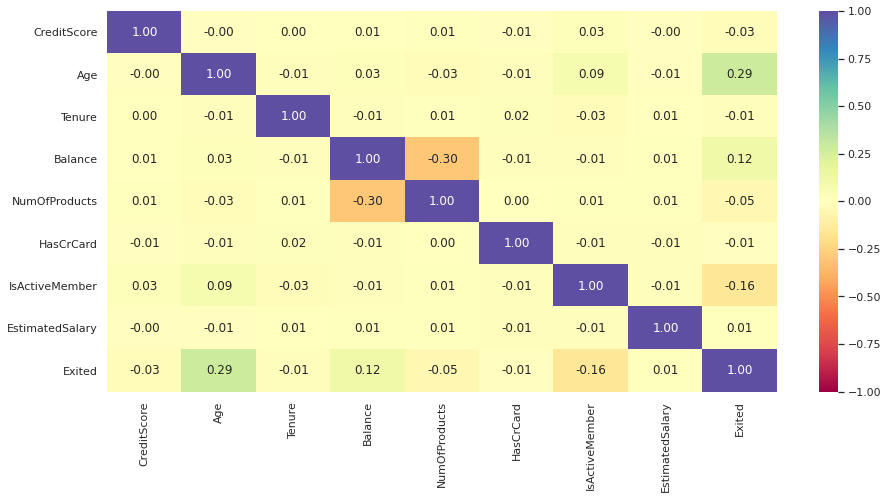

In [471]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral')
plt.show()

* There is some week correlation between Exited and Age and between Exited and Balance.
* There is also some week negative correlation between Exited and IsActiveMember and between Balance and Balance and NumberOfProducts.

In [472]:
### Function to plot distributions and Boxplots of customers
def plot(x,target='Exited'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of an Exited Customer')
    sns.distplot(data[(data[target] == 1)][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title('Distribution of an Existing Customer')
    sns.distplot(data[(data[target] == 0)][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title('Boxplot w.r.t Exited')
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title('Boxplot w.r.t Exited - Without outliers')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow')
    plt.tight_layout()
    plt.show()

In [473]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['Exited'],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['Exited'],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


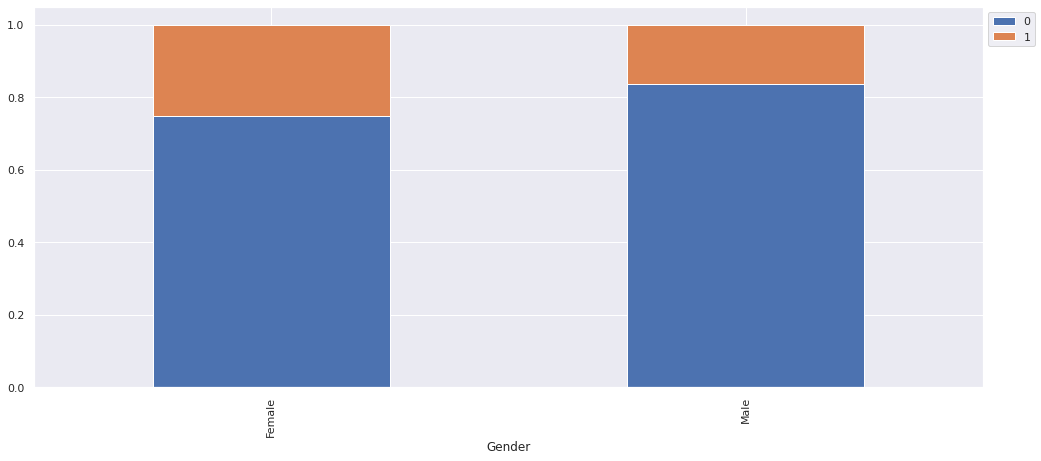

In [474]:
stacked_plot(data['Gender'])

* we can see from the plot that distribution of data between male and female is almost same, There is not much variance.
* Also, we can see that percentage of female leaving the bank is around 25% where as in Males it's less than 20%. 

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


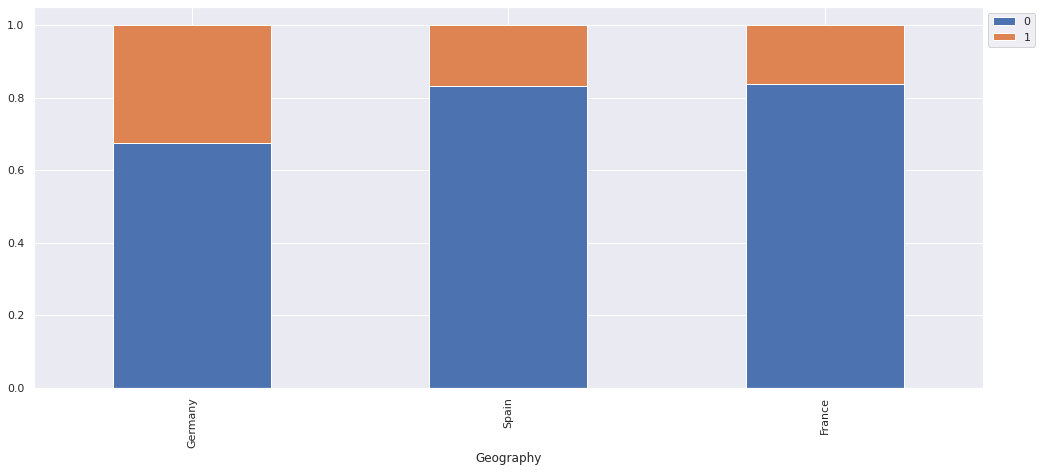

In [475]:
stacked_plot(data["Geography"])

* we can see disribution of customers in terms of geography is
Germany(25%), Spain(25%) and France(50%).
* 50% of the customers are from France.
* Around 17% of the customers from France and Spain have left the bank.
* Around 32% of the customers from Germany have left the bank.

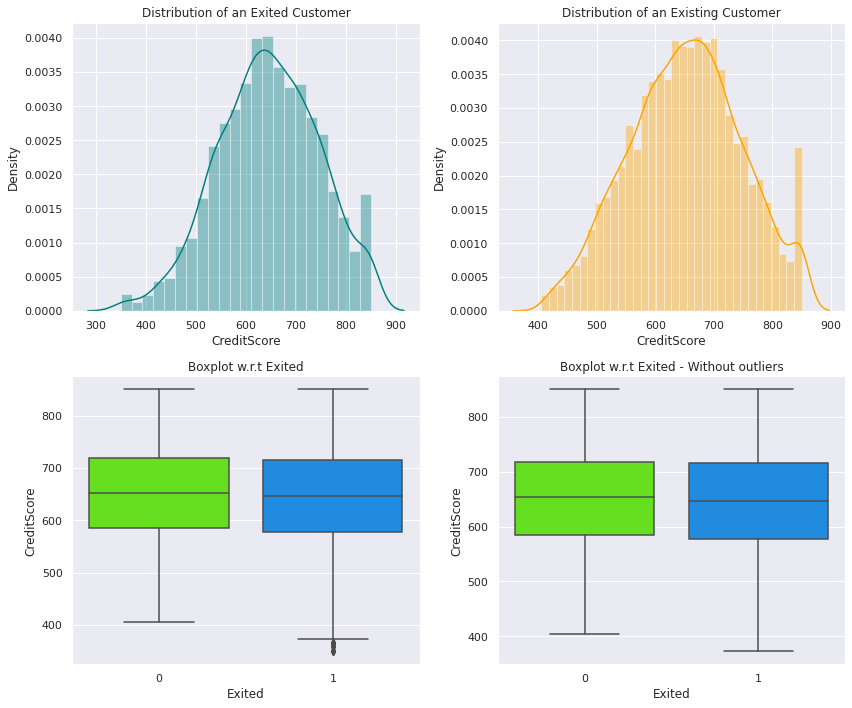

In [476]:
plot('CreditScore')


* Customer with CreditScore of less than 400 have higher chances to leave the bank.

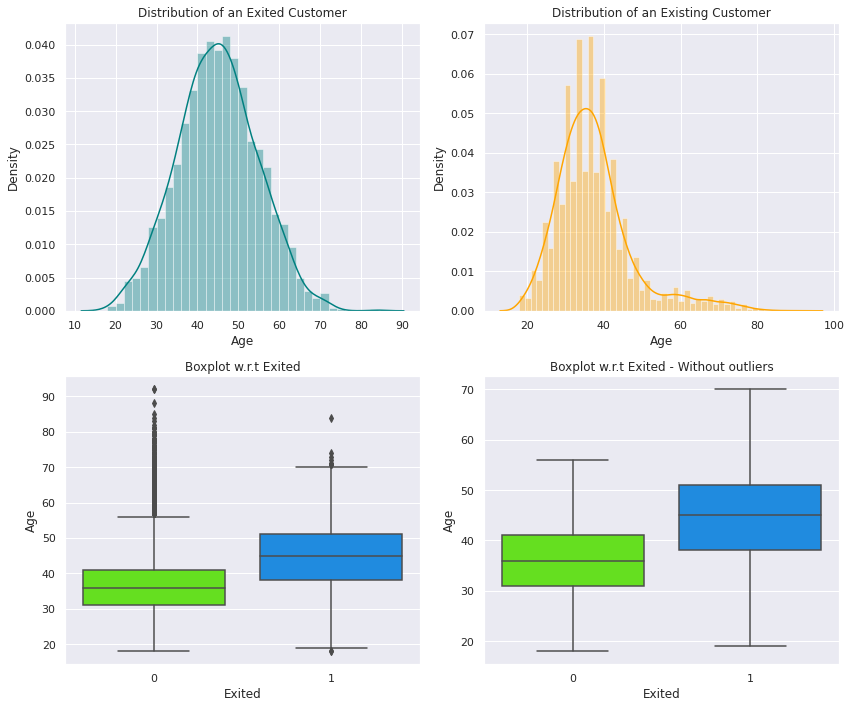

In [477]:
plot('Age')

* 40 to 70 years old customers are higher chances to churn

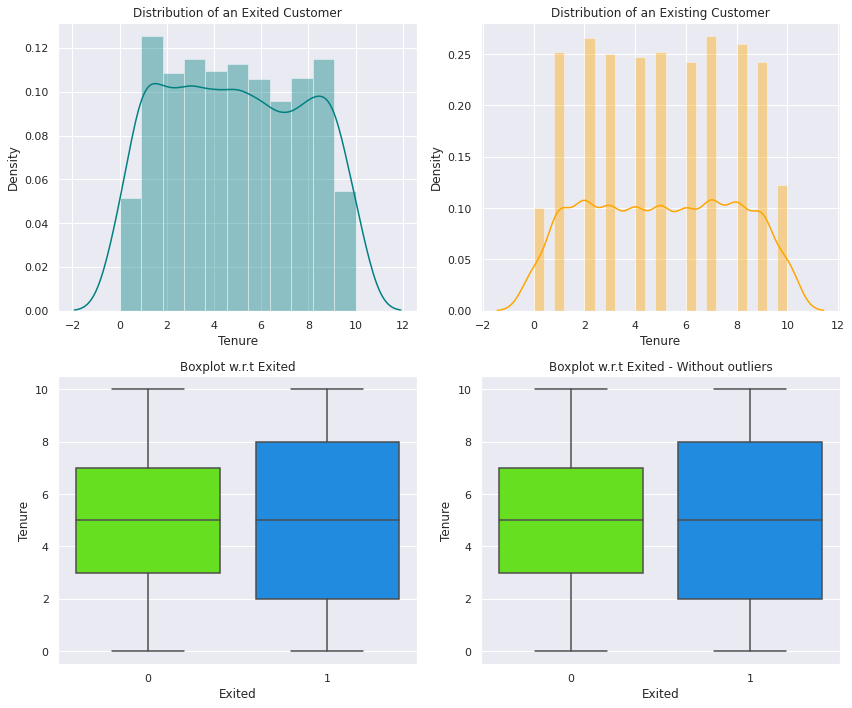

In [478]:
plot("Tenure")

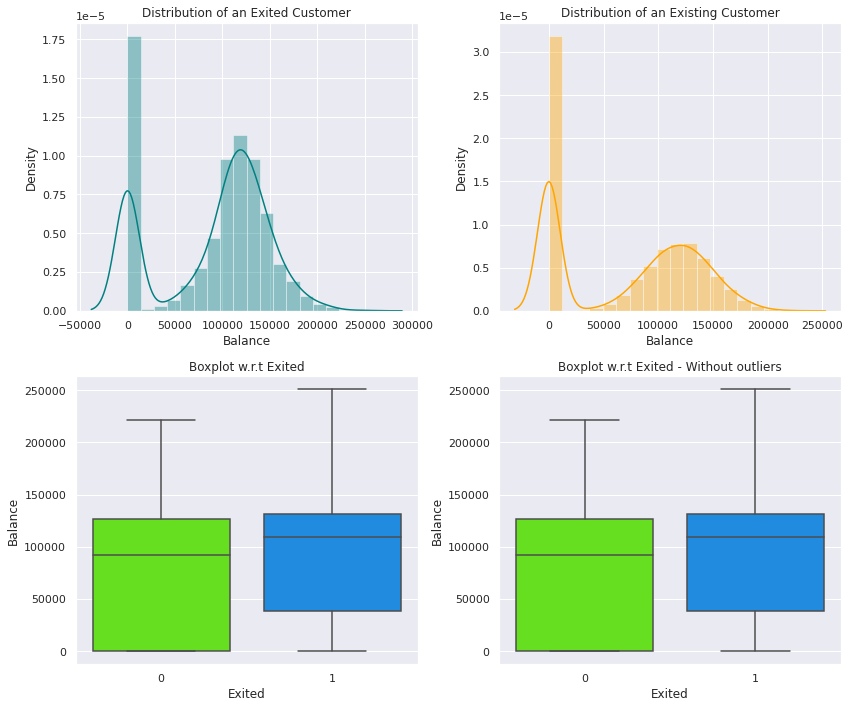

In [479]:
plot('Balance')

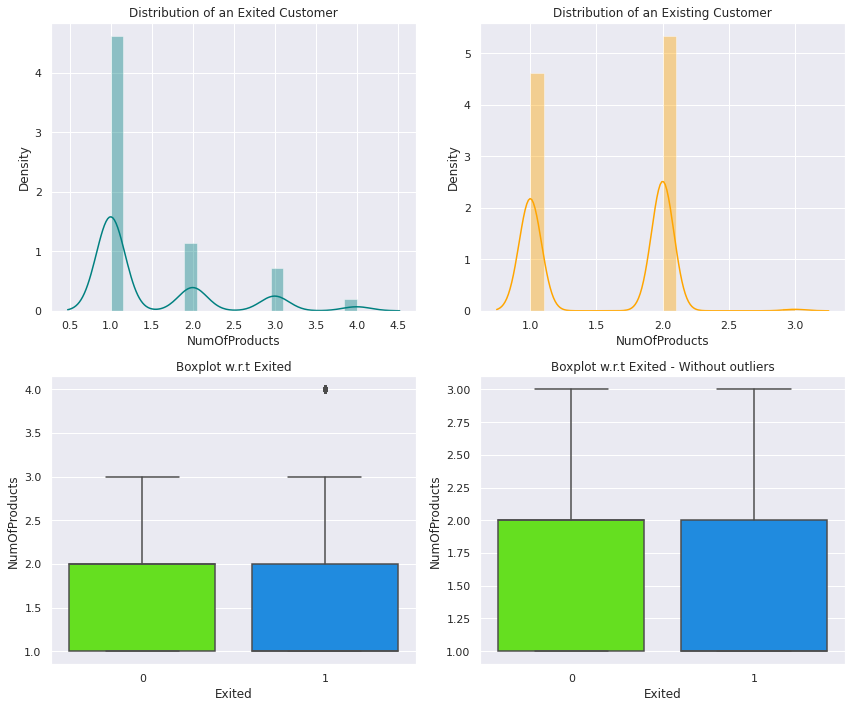

In [480]:
plot("NumOfProducts")

* customers with 3 or 4 products have higher chances to leave the bank.

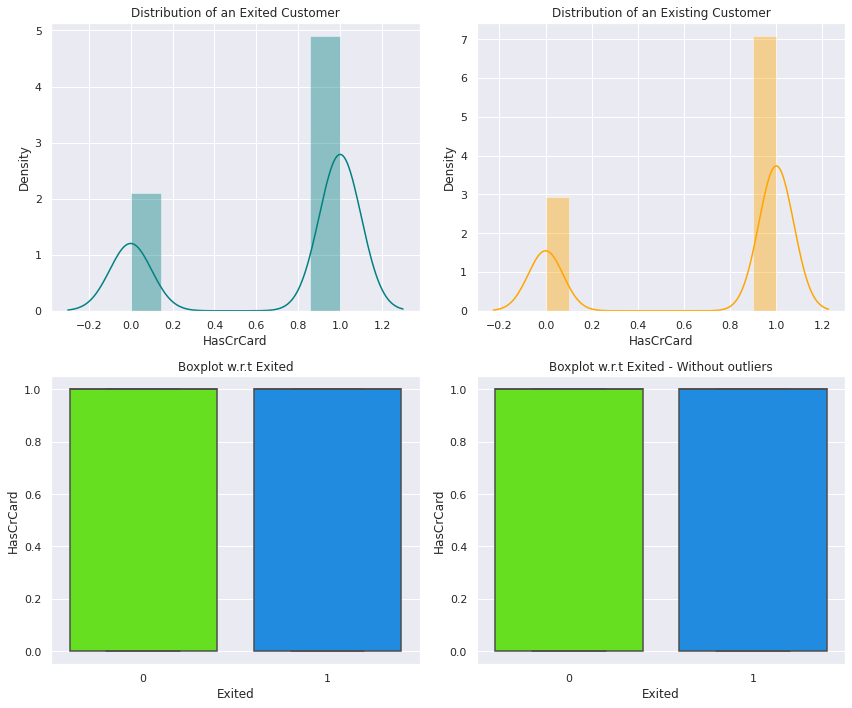

In [481]:
plot("HasCrCard")

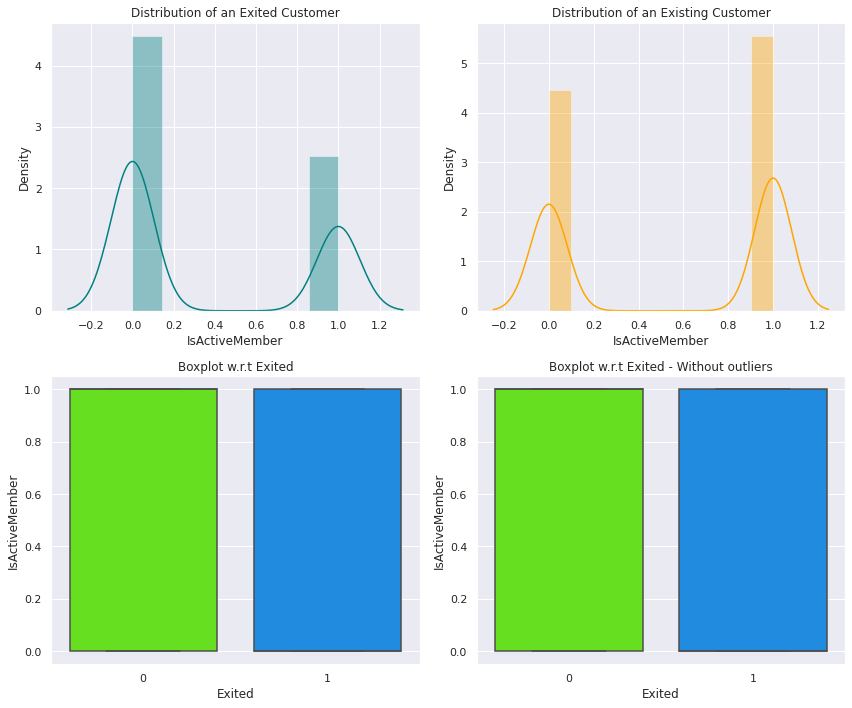

In [482]:
plot("IsActiveMember")

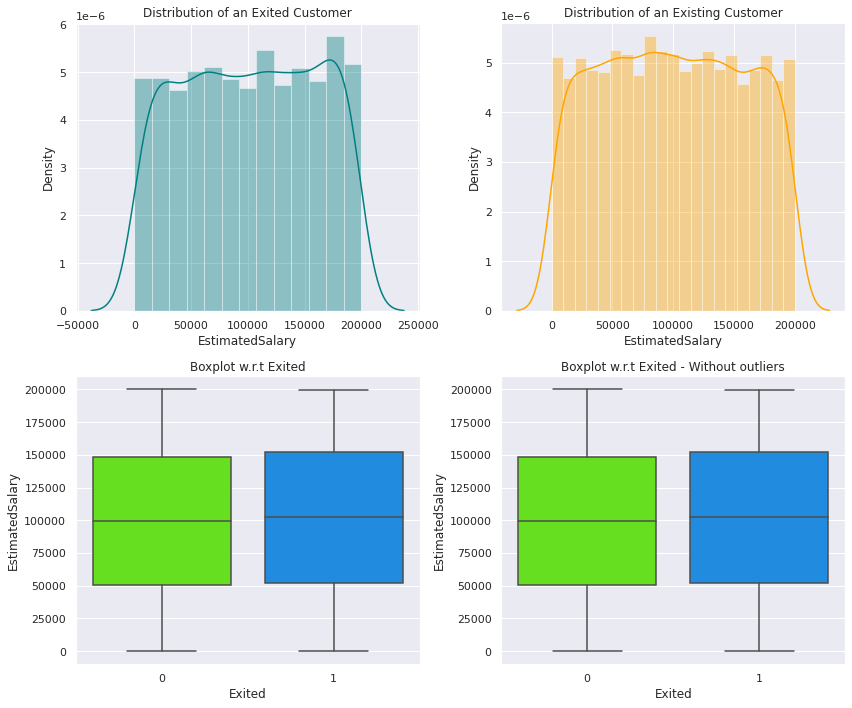

In [483]:
plot("EstimatedSalary")

In [484]:
# one hot encoding for Geography.
data = pd.get_dummies(data, columns=['Geography','Gender'],drop_first=True)
data.sample(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
7427,714,33,8,122017.19,1,0,0,162515.17,0,0,1,1
7631,677,40,7,95312.80,1,1,1,62944.75,0,0,1,1


###Data Pre-processing.

In [485]:
X=data.drop(columns='Exited')
y=data['Exited']

X.shape

(10000, 11)

####splitting data into train and test.

In [486]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Feature Scaling
X_train.sample(2)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7647,768,25,0,78396.08,1,1,1,8316.19,0,0,1
6299,590,24,7,126431.54,1,1,0,58781.11,0,0,1


####Scaling data using standard scalar.

In [487]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#### Checking if the split data set is balanced or not.


In [488]:
print("Train data Value count")
print(y_train.value_counts())

print("\nTrain data class percentage")
print((y_train.value_counts())/y_train.count())

print("\nTest data Value count")
print(y_test.value_counts())

print("\nTest data class percentage")
print((y_test.value_counts())/y_test.count())


Train data Value count
0    6378
1    1622
Name: Exited, dtype: int64

Train data class percentage
0    0.79725
1    0.20275
Name: Exited, dtype: float64

Test data Value count
0    1585
1     415
Name: Exited, dtype: int64

Test data class percentage
0    0.7925
1    0.2075
Name: Exited, dtype: float64


##### Data is splitted evenly in the original % of 20 and 80 as in original dataset.

In [489]:

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

###Model Building 
## Model evaluation criterion

### Model can make wrong predictions as:
* Predicting a customer is leaving, but customer is not leaving.
* Predicting a customer is not leaving but leaves the bank.

### Which case is more important? 
* Predicting a customer is not leaving but leaves the bank. This will have direct revenue impact to the bank.

### How to reduce this loss i.e need to reduce False Negative?
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the Company can identify the fraud transaction.

## Deep neural network

Model-1 

- We will use a simple NN made of 5 fully-connected layers with ReLu activation. The NN takes a vector of length 11 as input. This represents the information related to each transactions, ie each line with 11 columns from the dataset. For each transaction, the final layer will output a probability distribution (sigmoid activation function) and classify either as not exited (0) or exited (1).





###Creating Model

In [490]:
# Creating the model.
model = Sequential()

#### Adding layers to the model.

In [491]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=16, input_dim = 11,activation='relu'))   
# hidden layer
model.add(Dense(16,activation='relu'))

# Adding the output layer
model.add(Dense(1,activation='sigmoid'))  

In [492]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [493]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 16)                192       
_________________________________________________________________
dense_42 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 17        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [494]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
427/427 [==============================] - 2s 3ms/step - loss: 0.4847 - accuracy: 0.7992 - val_loss: 0.4367 - val_accuracy: 0.8169
Epoch 2/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4162 - accuracy: 0.8211 - val_loss: 0.4105 - val_accuracy: 0.8231
Epoch 3/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3943 - accuracy: 0.8388 - val_loss: 0.3859 - val_accuracy: 0.8356
Epoch 4/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3748 - accuracy: 0.8495 - val_loss: 0.3690 - val_accuracy: 0.8419
Epoch 5/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3631 - accuracy: 0.8555 - val_loss: 0.3586 - val_accuracy: 0.8475
Epoch 6/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3557 - accuracy: 0.8555 - val_loss: 0.3535 - val_accuracy: 0.8506
Epoch 7/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3506 - accuracy: 0.8583 - val_loss: 0.3542 - val_accuracy: 0.8494
Epoch 

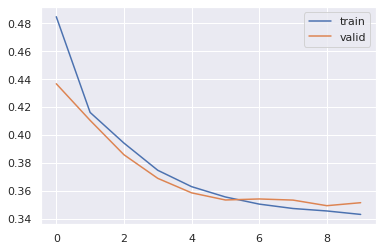

In [495]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [496]:
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.484733,0.799219,0.436737,0.816875,0
1,0.416211,0.821094,0.410538,0.823125,1
2,0.394268,0.838750,0.385912,0.835625,2
3,0.374790,0.849531,0.369012,0.841875,3
4,0.363067,0.855469,0.358631,0.847500,4
5,0.355672,0.855469,0.353513,0.850625,5
6,0.350558,0.858281,0.354243,0.849375,6
7,0.347410,0.861250,0.353434,0.846250,7
8,0.345647,0.862813,0.349427,0.846875,8
9,0.343175,0.862969,0.351568,0.846250,9


##### Model evaluation on training data.


In [497]:
train_score = model.evaluate(X_train, y_train)
train_score

250/250 [==============================] - 1s 2ms/step - loss: 0.3407 - accuracy: 0.8604


[0.340653657913208, 0.8603749871253967]

#####Model evaluation on testing data

In [498]:
test_score = model.evaluate(X_test, y_test)
test_score

63/63 [==============================] - 0s 1ms/step - loss: 0.3433 - accuracy: 0.8620


[0.343300998210907, 0.8619999885559082]

In [499]:
score=get_metrics_score(model,X_train,X_test,y_train,y_test,threshold=0.5,roc=True)

Accuracy on training set :  0.860375
Accuracy on test set :  0.862
Recall on training set :  0.4358816276202219
Recall on test set :  0.44096385542168676
Precision on training set :  0.7777777777777778
Precision on test set :  0.8061674008810573
F1 on training set :  0.5586724614776768
F1 on test set :  0.5700934579439252
ROC-AUC Score on training set :  0.7021051286423469
ROC-AUC Score on test set :  0.7066018015278781


Confusion matrix Training set
[[6176  202]
 [ 915  707]]


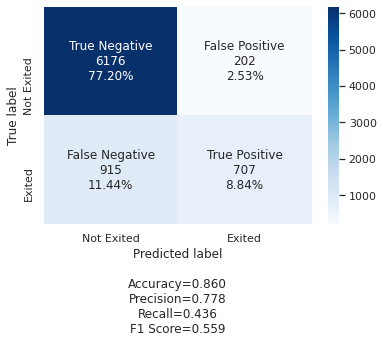

In [500]:
## Confusion Matrix on training set
print("Confusion matrix Training set")
y_pred_train = model.predict(X_train)
for i in range(len(y_train)):
    if y_pred_train[i]>0.5:
        y_pred_train[i]=1 
    else:
        y_pred_train[i]=0



cm2=confusion_matrix(y_train, y_pred_train)
print(cm2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm2,group_names=labels,categories=categories,cmap='Blues')

Confusion matrix Testing set
[[1541   44]
 [ 232  183]]


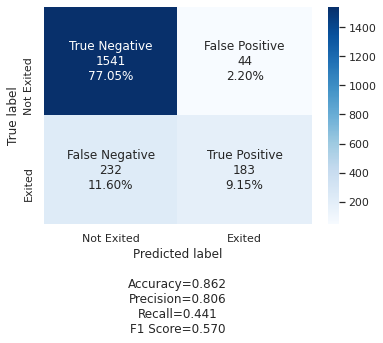

In [501]:
## Confusion Matrix on testing set
print("Confusion matrix Testing set")
y_pred_test = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred_test[i]>0.5:
        y_pred_test[i]=1 
    else:
        y_pred_test[i]=0



cm2=confusion_matrix(y_test, y_pred_test)
print(cm2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm2,group_names=labels,categories=categories,cmap='Blues')

#### Insight
* we can see the accuracy of the model on test data is 0.85 but this is not a good performance as recall is very low. we want the False negative to be very low.
* we are not able to identify more than 50% of the customer who left the bank.

Let's find optimal threshold to improve the recall.

###Optimal Threshold

In [502]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low

fpr, tpr, thresholds = metrics.roc_curve(y_train, model.predict(X_train))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)




0.20129848


### Creating new confusion matrix using optimal threshold.

Confusion matrix training set with optimal threshold.
[[5173 1205]
 [ 431 1191]]


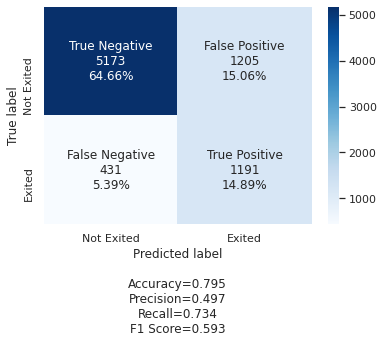

In [503]:

print("Confusion matrix training set with optimal threshold.")
y_pred_train = model.predict(X_train)
for i in range(len(y_train)):
    if y_pred_train[i]> optimal_threshold_auc_roc:
        y_pred_train[i]=1 
    else:
        y_pred_train[i]=0



cm2=confusion_matrix(y_train, y_pred_train)
print(cm2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm2,group_names=labels,categories=categories,cmap='Blues')

Confusion matrix testing set with optimal threshold.
[[1289  296]
 [ 114  301]]


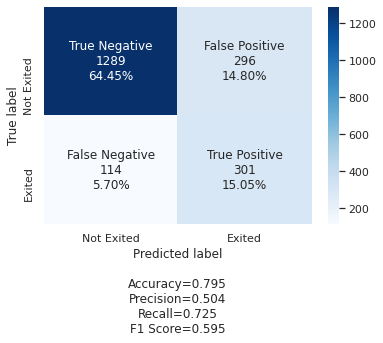

In [504]:
print("Confusion matrix testing set with optimal threshold.")
y_pred_test = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred_test[i]> optimal_threshold_auc_roc:
        y_pred_test[i]=1 
    else:
        y_pred_test[i]=0



cm2=confusion_matrix(y_test, y_pred_test)
print(cm2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm2,group_names=labels,categories=categories,cmap='Blues')

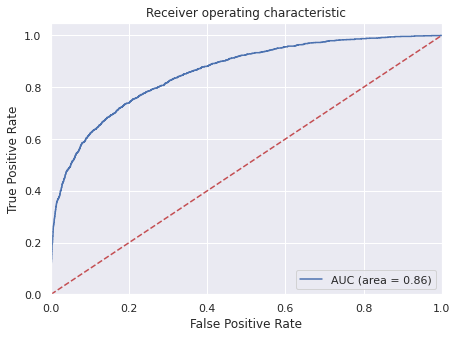

In [505]:
roc_auc_train = roc_auc_score(y_train, model.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, model.predict(X_train))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

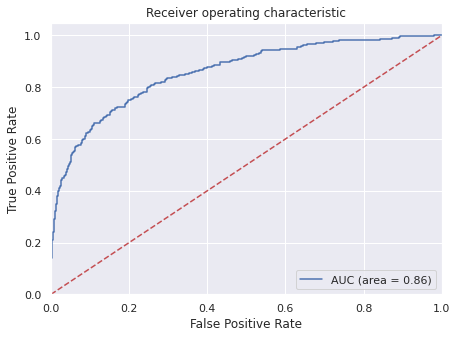

In [506]:
roc_auc_test = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [507]:
scores_op = get_metrics_score(model,X_train,X_test,y_train,y_test,threshold=optimal_threshold_auc_roc,roc=True)

Accuracy on training set :  0.7955
Accuracy on test set :  0.795
Recall on training set :  0.7342786683107275
Recall on test set :  0.7253012048192771
Precision on training set :  0.49707846410684475
Precision on test set :  0.5041876046901173
F1 on training set :  0.5928322548531608
F1 on test set :  0.5948616600790514
ROC-AUC Score on training set :  0.7726739845159785
ROC-AUC Score on test set :  0.769275208087872


#### Insight
* we can see with the optimal thresold there is little bit of decrease in accuracy but there is improvement in the Recall. 
* Lets check if we can further increase the recall using hyperparameter.

In [507]:
#Training Multi-layer perceptron with 2 hidden layers

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
#Initializing the weights uisng hue_normal 
Model2.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=1)
